<a href="https://colab.research.google.com/github/SHRAVAN-AMBEER/Machine-Learning-Lab/blob/main/ml_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/santaner/3grHi.csv
/kaggle/input/santaner/3grperesech.csv
/kaggle/input/santaner/3grFtest.csv
/kaggle/input/santaner/1grHi.csv
/kaggle/input/santaner/1grFtest.csv
/kaggle/input/santaner/testnozavisimost.csv
/kaggle/input/santaner/1grPeresech.csv
/kaggle/input/santaner/zavisimost.csv
/kaggle/input/santaner/2grFtest.csv
/kaggle/input/santaner/train.csv
/kaggle/input/santaner/2grPeresech.csv
/kaggle/input/santaner/test.csv
/kaggle/input/santaner/2grHi.csv


In [3]:
import numpy as np
import pandas as pd

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df=pd.read_csv("/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/Santander Customer Satisfaction_train.csv")
print(df.head())
print(df.shape)
#constant feature
[col for col in df.columns if df[col].isnull().sum()>0]

   ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...

[]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df=pd.read_csv("/kaggle/input/santaner/train.csv")
print(df.head())
print(df.shape)
#constant feature
[col for col in df.columns if df[col].isnull().sum()>0]

In [ ]:
print(df.columns)

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels=['imp_op_var40_efect_ult1'], axis=1),
    df['imp_op_var40_efect_ult1'],
    test_size=0.3,
    random_state=0
)

In [ ]:
#In this method we remove the feature columns which have same value in all the data i.e.,
#where variance is zero.  (A constant feature has the same value for all rows in the dataset.)
constant_features = [
    feature for feature in x_train.select_dtypes(include=['number']).columns
    if x_train[feature].std() == 0
]
print(len(constant_features)) #There are no numeric columns in your x_train whose values are all the same.

38


In [ ]:

numeric_cols = x_train.select_dtypes(include=['number']).columns
print(numeric_cols)
print(f"Number of numeric columns: {len(numeric_cols)}")

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult3',
       'imp_op_var40_ult1',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=370)
Number of numeric columns: 370


In [ ]:
x_train.drop(labels= constant_features, axis=1, inplace=True)
x_test.drop(labels=constant_features, axis=1, inplace=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels=['imp_op_var40_efect_ult1'], axis=1),  # Note the capital "T"
    df['imp_op_var40_efect_ult1'],
    test_size=0.3,
    random_state=0
)

In [ ]:
# Create an empty list to store the names of features (columns) that are quasi-constant.
quasi_constant_feat = []

# Loop for searching all the columns in the data
# Iterates through each feature/column in the training dataset x_train
for feature in x_train.columns:
    # find the predominant value
    # x_train[feature].value_counts() - counts how many times each unique value appears.
    # Dividing by len(x_train) - gives the proportion (frequency) of each value.
    # .sort_values(ascending=False).values[0] - picks the most frequent value's proportion.
    predominant = (x_train[feature].value_counts() / len(x_train)).sort_values(ascending=False).values[0]

    # evaluate predominant feature
    # If the most common value in that column appears in more than 99.9% of the rows,
    # the feature is considered quasi-constant, and it is added to the list.
    if predominant > 0.999:
        quasi_constant_feat.append(feature)

# This line would typically be used to display the list of quasi-constant features
# after the loop has completed.
len(quasi_constant_feat)

145

In [ ]:
x_train.drop(labels=quasi_constant_feat, axis=1, inplace=True)
x_test.drop(labels=quasi_constant_feat, axis=1, inplace=True)
print(x_train.shape, x_test.shape)

(53214, 225) (22806, 225)


In [ ]:
# Create an empty list for duplicated features
duplicated_feat = []

for i in range(len(x_train.columns)):
    col_1 = x_train.columns[i]

    for col_2 in x_train.columns[i + 1:]:
        # if the features are duplicated
        if x_train[col_1].equals(x_train[col_2]):
            # and then append the duplicated one to the list
            duplicated_feat.append(col_2)

In [ ]:
duplicated_features = set(duplicated_feat)

# Print the number of unique duplicated features
print(len(duplicated_features))

10


In [ ]:
duplicated_features = [col for col in duplicated_features if col in x_train.columns]

x_train.drop(columns=duplicated_features, inplace=True)
x_test.drop(columns=duplicated_features, inplace=True)

print(x_train.shape, x_test.shape)

(53214, 214) (22806, 214)


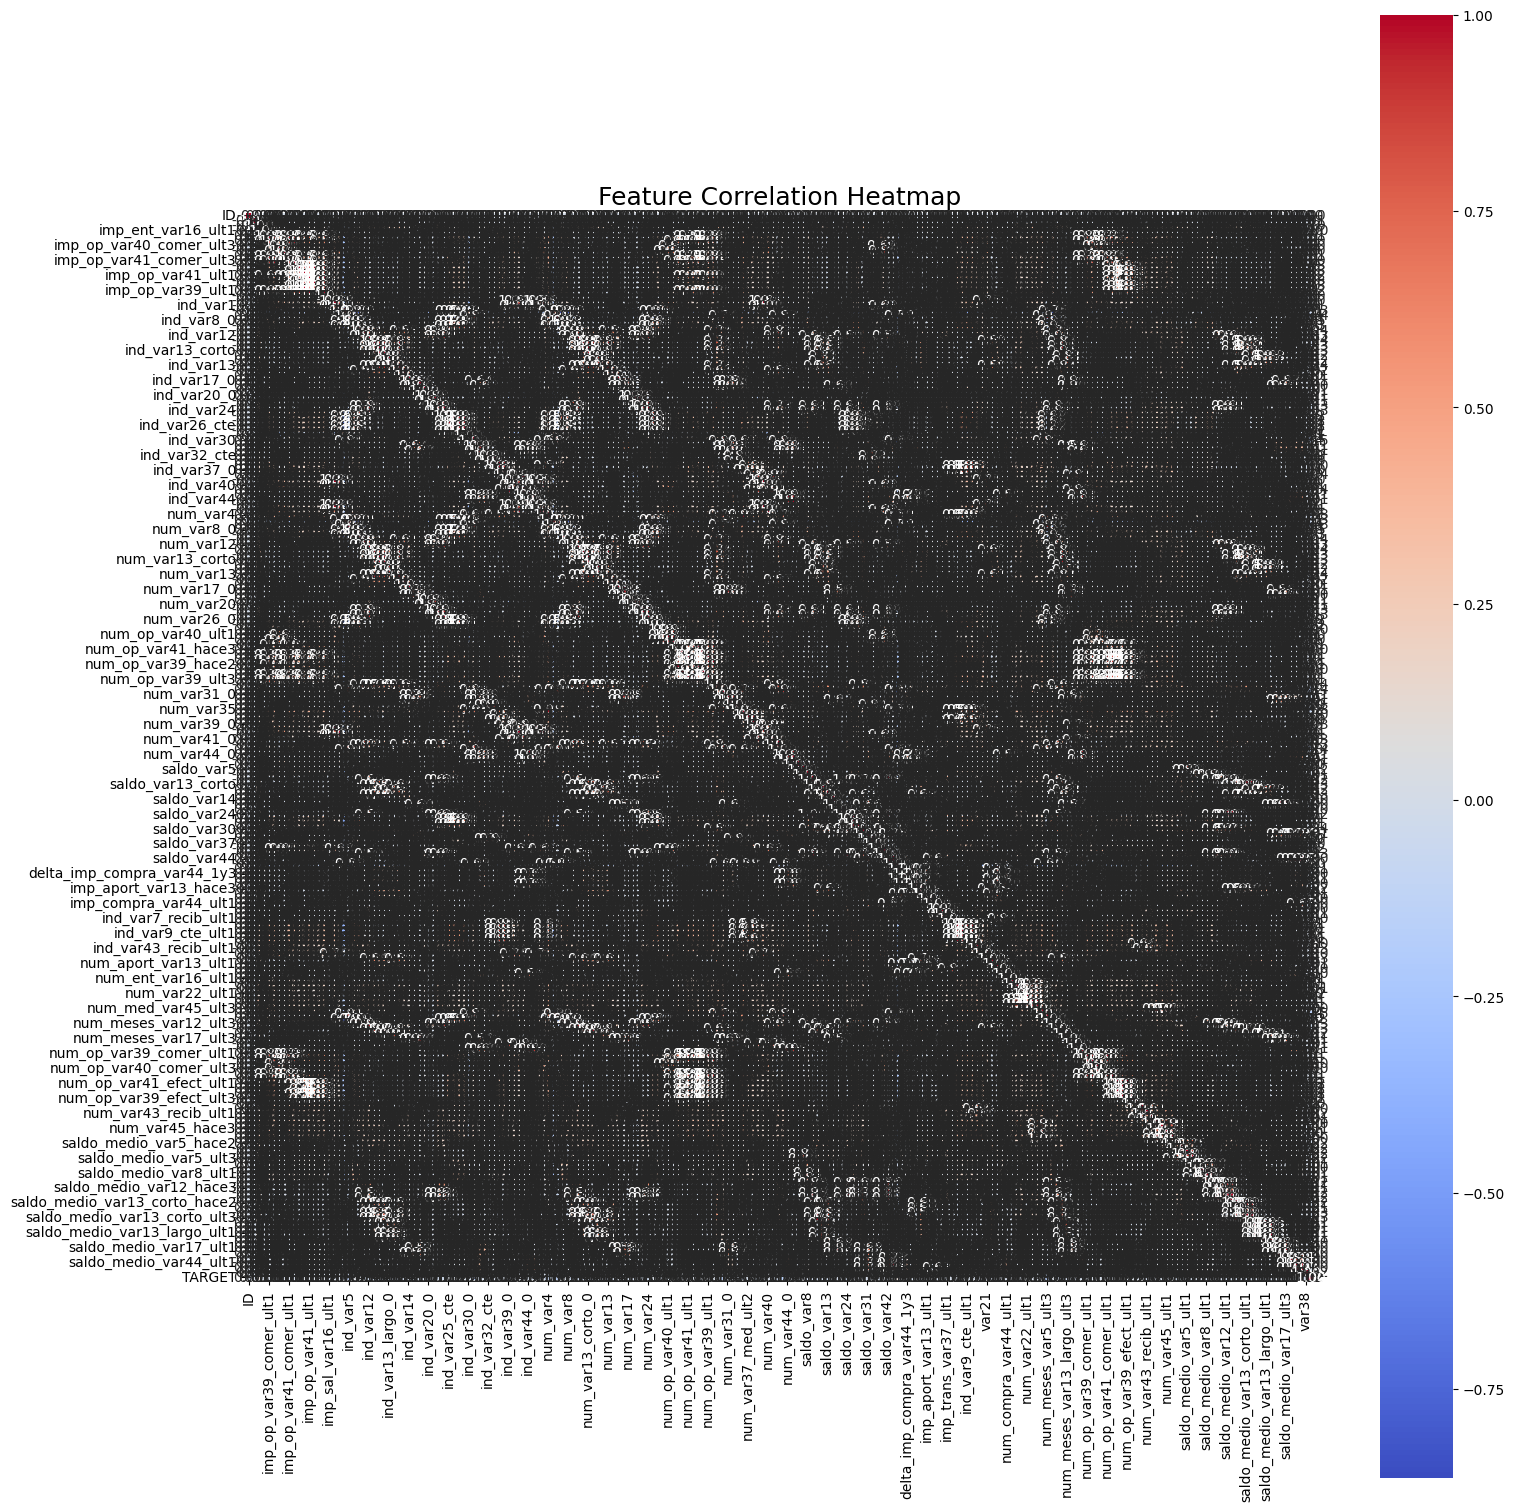

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_x_train = x_train.select_dtypes(include=["number"])

# Compute correlation matrix
corrmat = numeric_x_train.corr()

# Plot heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(corrmat, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Feature Correlation Heatmap", fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set to hold the correlated column names
    numeric_dataset = dataset.select_dtypes(include=['number'])  # Select only numeric columns
    corr_matrix = numeric_dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname1 = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                print(f"{colname1} and {colname2} are correlated: {corr_matrix.iloc[i, j]:.2f}")
                col_corr.add(colname1)  # You can choose colname2 instead if you prefer
    return col_corr
# Call the function with numeric-filtered data
corr_features = correlation(x_train, 0.9)
print(f"\nNumber of highly correlated features: {len(corr_features)}")
print("Correlated features to drop:", corr_features)

# Optional: drop from both train and test
x_train.drop(columns=corr_features, inplace=True)
x_test.drop(columns=corr_features, inplace=True)
x_train.shape, x_test.shape

imp_op_var41_comer_ult1 and imp_op_var39_comer_ult1 are correlated: 0.96
imp_op_var41_comer_ult3 and imp_op_var39_comer_ult3 are correlated: 0.96
imp_op_var39_efect_ult1 and imp_op_var41_efect_ult1 are correlated: 1.00
imp_op_var39_efect_ult3 and imp_op_var41_efect_ult3 are correlated: 1.00
imp_op_var39_ult1 and imp_op_var41_ult1 are correlated: 0.99
ind_var8 and ind_var8_0 are correlated: 0.93
ind_var13_corto_0 and ind_var13_0 are correlated: 0.90
ind_var13_corto and ind_var13_corto_0 are correlated: 0.98
ind_var13_largo and ind_var13_largo_0 are correlated: 0.99
ind_var13 and ind_var13_0 are correlated: 0.98
ind_var24 and ind_var12 are correlated: 0.91
ind_var24 and ind_var24_0 are correlated: 0.95
ind_var26_0 and ind_var25_cte are correlated: 0.92
ind_var26_cte and ind_var25_cte are correlated: 0.98
ind_var26_cte and ind_var26_0 are correlated: 0.95
ind_var25_0 and ind_var25_cte are correlated: 0.95
ind_var25_0 and ind_var26_0 are correlated: 0.98
ind_var25_0 and ind_var26_cte are c

((53214, 120), (22806, 120))

In [15]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/house_price_train.csv")

# Features and target
X = df.drop(columns=['SalePrice'])
Y = df['SalePrice']

# Select categorical columns and apply one-hot encoding
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Fill missing values with 0
X_encoded = X_encoded.fillna(0)

# Mutual Information for regression
mi_scores = mutual_info_regression(X_encoded, Y)

# Create DataFrame and sort
mi_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Mutual Information Score': mi_scores
}).sort_values('Mutual Information Score', ascending=False)

mi_df

,Feature,Mutual Information Score
4,OverallQual,0.557429
16,GrLivArea,0.482217
12,TotalBsmtSF,0.368181
6,YearBuilt,0.365806
27,GarageArea,0.361992
...,...,...
231,MiscFeature_TenC,0.000000
235,SaleType_ConLI,0.000000
234,SaleType_ConLD,0.000000
242,SaleCondition_Family,0.000000


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

cat_cols = x_train.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", cat_cols.tolist())

# 5. One-hot encode categorical columns in train and test
x_train_encoded = pd.get_dummies(x_train, columns=cat_cols, drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=cat_cols, drop_first=True)

# 6. Align columns of test set to train set (add missing columns with 0)
x_test_encoded = x_test_encoded.reindex(columns=x_train_encoded.columns, fill_value=0)

# 7. Fill missing values if any
x_train_filled = x_train_encoded.fillna(0)
x_test_filled = x_test_encoded.fillna(0)
# 8. Select top 10 features based on mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(x_train_filled, y_train)

selected_features = x_train_encoded.columns[selector.get_support()]

print("Top 10 features selected by mutual information:")
print(selected_features)

# Optional: transform train and test sets to selected features only
x_train_selected = selector.transform(x_train_filled)
x_test_selected = selector.transform(x_test_filled)